<a href="https://colab.research.google.com/github/Hardik1310/Titanic-Case-Study/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necesaary libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#file management
import os

#surpress warning
import warnings
warnings.filterwarnings('ignore')


Importing dataset

In [88]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

# EDA & Data-Preprocessing

Viewing the train dataset

In [64]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Viewing no of null data in each feature of the train dataset

In [25]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Viewing the test dataset

In [66]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Viewing no of null data in each feature of the test dataset

In [28]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Plotting No. of Males vs No. of Females

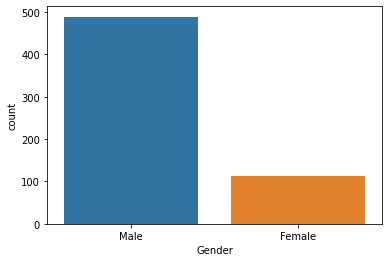

In [29]:
sns.countplot(train['Gender'])

Approval of loans between Males & Females

In [30]:
pd.crosstab(train.Gender, train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


The male are in large number as compared to female applicants.

Filling up NAN values of Gender and Converting categorial variables(Male,Female) to numerical variables(0,1)

In [89]:
train.Gender=train.Gender.fillna(train.Gender.mode())
test.Gender=train.Gender.fillna(test.Gender.mode())

sex = pd.get_dummies(train['Gender'] , drop_first = True )
train.drop(['Gender'], axis = 1 , inplace =True)
train = pd.concat([train , sex ] , axis = 1)

sex=pd.get_dummies(test['Gender'], drop_first =True )
test.drop(['Gender'],axis =1, inplace =True )
test=pd.concat([test, sex],axis =1)

No. of Dependants (Size of family) in each household

In [74]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Approval of loans between different sizes of families

In [90]:
pd.crosstab(train.Dependents,train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


Filling up NAN values of Dependents and Converting categorial variables(1,2,3+) to numerical variables(1,2,3)

In [91]:
train.Dependents=train.Dependents.fillna("0")
test.Dependents=test.Dependents.fillna("0")

In [92]:
rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(rpl).astype(int)
test.Dependents = test.Dependents.replace(rpl).astype(int)

Plotting No. of people with vs without Credit History

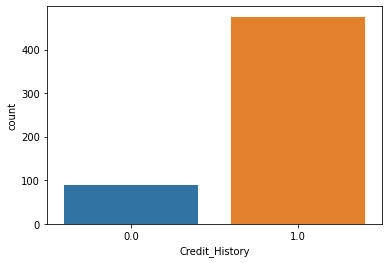

In [78]:
sns.countplot(train['Credit_History'])

Approval of loans people those who have Credit History and those who don't

In [79]:
pd.crosstab(train.Credit_History,train.Loan_Status,margins =True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


Filling up NAN values of Credit history by taking the mode

In [93]:
train.Credit_History=train.Credit_History.fillna(train.Credit_History.mode())
test.Credit_History=test.Credit_History.fillna(test.Credit_History.mode())

Plotting No. of people who are Self-employed vs who aren't

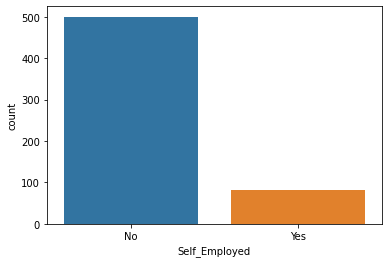

In [81]:
sns.countplot(train['Self_Employed'])

Approval of loans between people who are Self-employed & who aren't

In [82]:
pd.crosstab(train.Self_Employed,train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)

In [94]:
train.Self_Employed=train.Self_Employed.fillna(train.Self_Employed.mode())
test.Self_Employed=test.Self_Employed.fillna(test.Self_Employed.mode())

In [95]:
self_Employed = pd.get_dummies(train.Self_Employed,prefix = 'employed' ,drop_first = True )


In [96]:
train.drop(['Self_Employed'], axis = 1 , inplace =True)
train = pd.concat([train , self_Employed ] , axis = 1)

In [97]:
self_Employed=pd.get_dummies(test.Self_Employed,prefix ='employed',drop_first =True)


In [100]:

test= pd.concat([test,self_Employed],axis =1)

Plotting No. of Married people vs Unmarried people

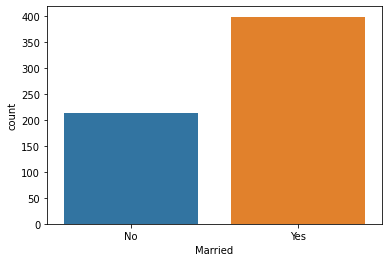

In [101]:
sns.countplot(train['Married'])

Approval of loans between Married and Unmarried people

In [103]:
pd.crosstab(train.Married , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)

In [105]:
train.Married = train.Married.fillna(train.Married.mode())
test.Married = test.Married.fillna(test.Married.mode())

In [106]:
married = pd.get_dummies(train['Married'],prefix ='married', drop_first =True)

In [107]:
train.drop(['Married'],axis =1,inplace =True)

In [108]:
train=pd.concat([train,married], axis =1)

In [109]:
married= pd.get_dummies(test['Married'],prefix='married', drop_first =True)

In [111]:
test.drop(['Married'],axis =1, inplace = True)

In [112]:
test =pd.concat([test, married],axis = 1)

Filling up NAN values of Loan Amount Term